## Spherical divergence correction dataset

### Dataset

**Train** 

| Filename | About this file | Size | N ffid |  Length |
| :------ | ----: | ----: | ----: | ----: |
| 2_TAR_raw.sgy | Raw field seismogram | 86M | 10 | 4 s |

**Validation**

| Filename | About this file | Size | N ffid |  Length |
| :------ | ----: | ----: | ----: | ----: |
| 2_TAR_v0_t1.sgy | Corrected seismograms with v=0, t=1 | 86M | 10 | 4 s |
| 2_TAR_v0_t2.sgy | Corrected seismograms with v=0, t=2 | 86M | 10 | 4 s |
| 2_TAR_v1_t0.sgy | Corrected seismograms with v=1, t=0 | 86M | 10 | 4 s |
| 2_TAR_v1_t1.sgy | Corrected seismograms with v=1, t=1 | 86M | 10 | 4 s |
| 2_TAR_v1_t2.sgy | Corrected seismograms with v=1, t=2 | 86M | 10 | 4 s |
| 2_TAR_v2_t0.sgy | Corrected seismograms with v=2, t=0 | 86M | 10 | 4 s |
| 2_TAR_v2_t1.sgy | Corrected seismograms with v=2, t=1 | 86M | 10 | 4 s |
| 2_TAR_v2_t2.sgy | Corrected seismograms with v=2, t=2 | 86M | 10 | 4 s |


Below we show sample trace headers and sample seismogram with corrected seismograms from the train dataset.

Sample trace headers:

In [1]:
import sys
sys.path.append('..')

import numpy as np
from seismicpro.src import SeismicDataset, FieldIndex

In [2]:
path_raw = '/data/SD/dataset_1/2_TAR_raw.sgy'
path_corr = '/data/SD/dataset_1/2_TAR_v2_t1.sgy'

field_index = (FieldIndex(name='raw', extra_headers=['offset'], path=path_raw).
               merge(FieldIndex(name='corrected', path=path_corr)))
field_index.head()

,offset,TraceNumber,TRACE_SEQUENCE_FILE,file_id,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw,corrected,corrected
FieldRecord,,,,,,
3237,3075,1,1,/data/SD/dataset_1/2_TAR_raw.sgy,1,/data/SD/dataset_1/2_TAR_v2_t1.sgy
3237,3030,2,2,/data/SD/dataset_1/2_TAR_raw.sgy,2,/data/SD/dataset_1/2_TAR_v2_t1.sgy
3237,2984,3,3,/data/SD/dataset_1/2_TAR_raw.sgy,3,/data/SD/dataset_1/2_TAR_v2_t1.sgy
3237,2940,4,4,/data/SD/dataset_1/2_TAR_raw.sgy,4,/data/SD/dataset_1/2_TAR_v2_t1.sgy
3237,2895,5,5,/data/SD/dataset_1/2_TAR_raw.sgy,5,/data/SD/dataset_1/2_TAR_v2_t1.sgy


Total number of field records and traces:

In [3]:
len(field_index), sum(field_index.tracecounts)

(10, 10880)

Sample of raw seisomogram, corrected seismogram and gain plot.

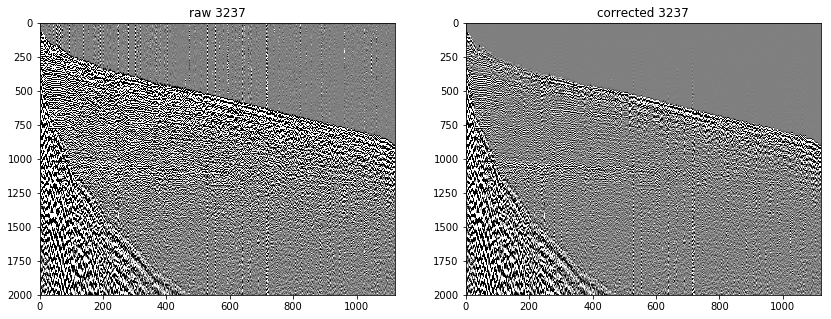

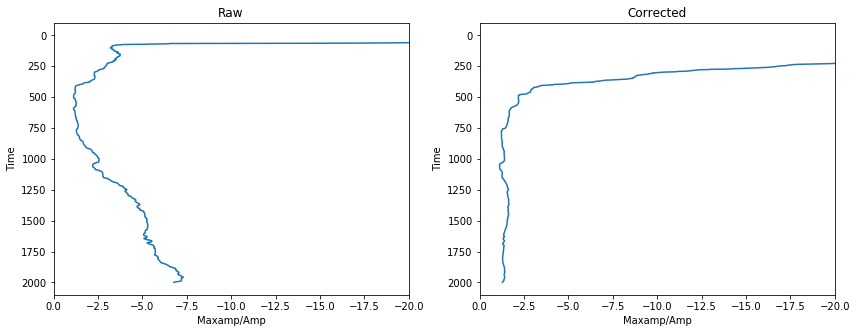

In [4]:
batch = (SeismicDataset(field_index).next_batch(1)
         .load(fmt='segy', components=('raw', 'corrected'))
         .sort_traces(src=('raw', 'corrected'), dst=('raw', 'corrected'), sort_by='offset'))

cv = 0.1
batch.seismic_plot(('raw', 'corrected'), batch.indices[0], figsize=(14, 5),
                    vmin=-cv, vmax=cv, cmap='gray')

batch.gain_plot(('raw', 'corrected'), batch.indices[0], 51,
                figsize=(14, 5), xlim=(0, -20), names=['Raw', 'Corrected']);

This pictures show the seismograms and gain's plots before (right) and after (left) spherical divergence correction.